In [ ]:
import pandas as pd
df = pd.read_csv('/uber.csv')
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [ ]:
df_cleaned=df.dropna()
df.shape

(200000, 9)

In [ ]:
df_cleaned.shape

(199999, 9)

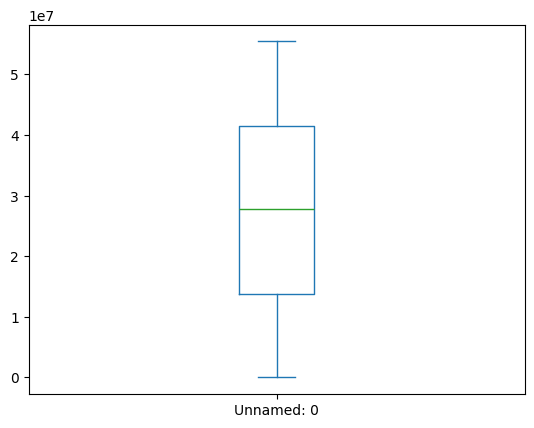

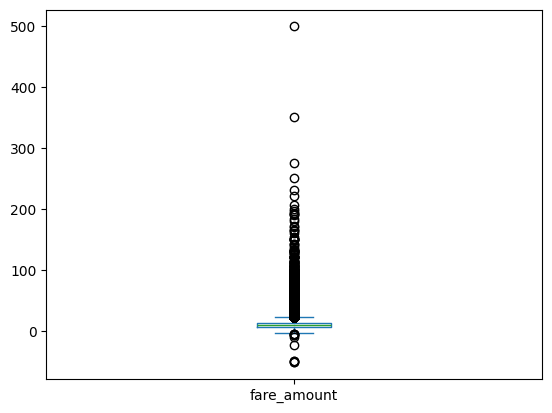

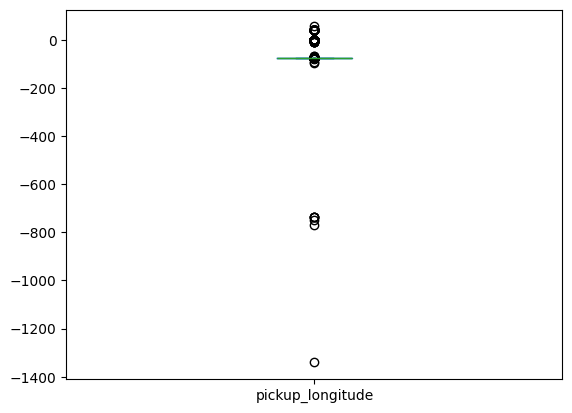

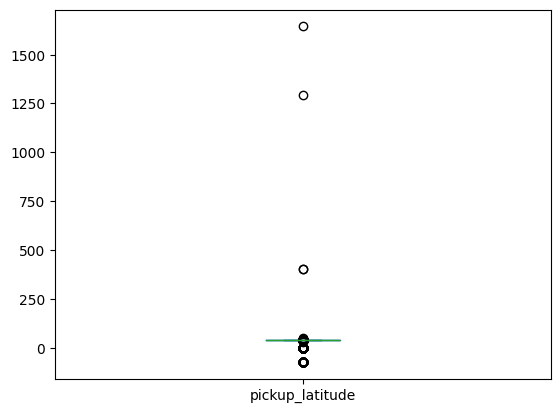

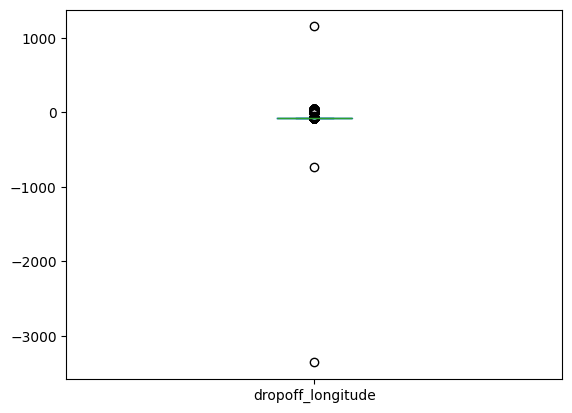

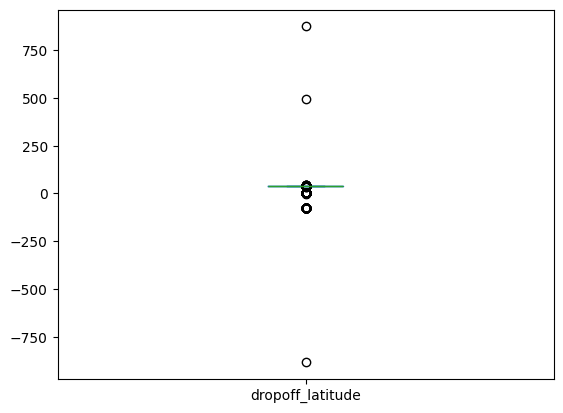

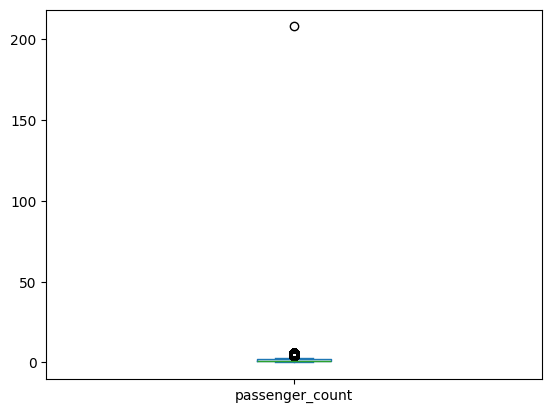

In [ ]:
#2. Identify the outlier and remove the outlier
import matplotlib.pyplot as plt

for col in df_cleaned.select_dtypes(include='number').columns:
    df[col].plot(kind='box')
    plt.show()

In [ ]:
def remove_outlier(df_cleaned):
    for col in df_cleaned.select_dtypes(include='number').columns:
        Q1=df_cleaned[col].quantile(0.25)
        Q3=df_cleaned[col].quantile(0.75)

        IQR  = Q3 - Q1

        lower_bound= Q1-1.5*IQR
        upper_bound= Q3+1.5*IQR
        df_no_outlier=df_cleaned[(df_cleaned[col]>=lower_bound) & (df_cleaned[col]<=upper_bound)]
    return df_no_outlier
removed_outlier=remove_outlier(df_cleaned)
removed_outlier.shape

(177442, 9)

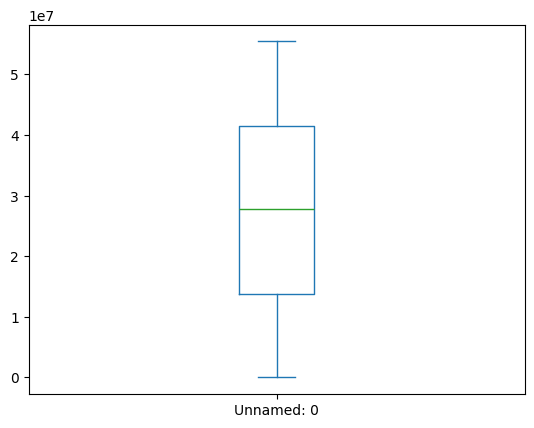

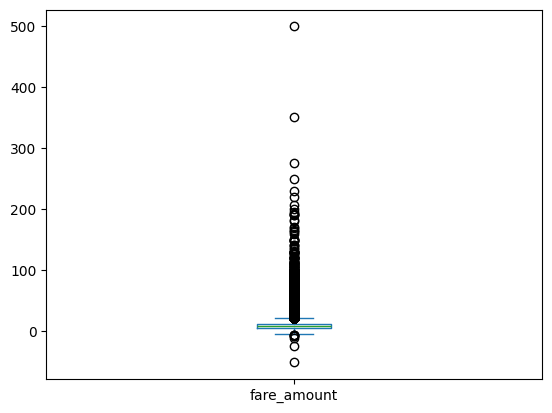

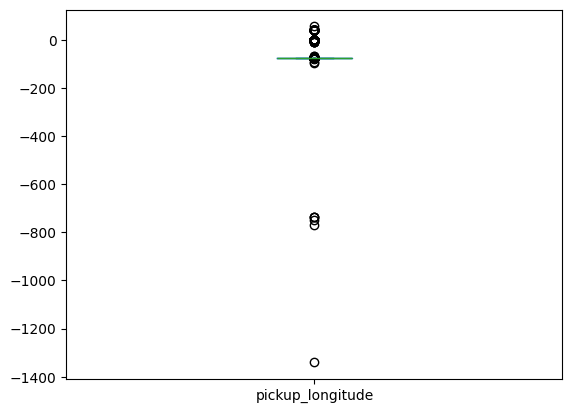

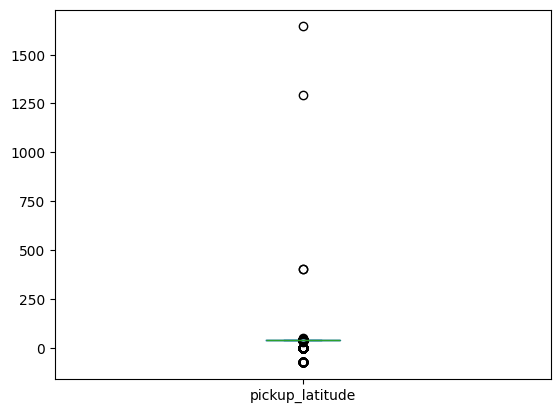

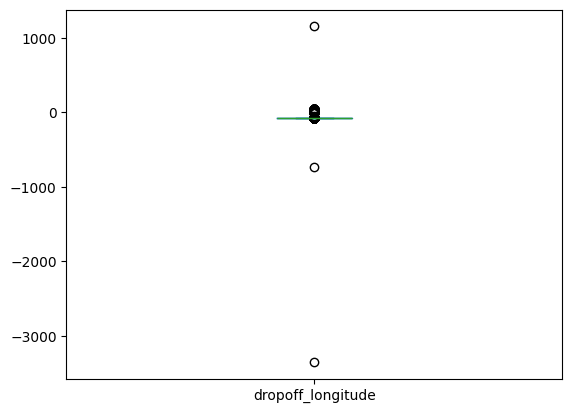

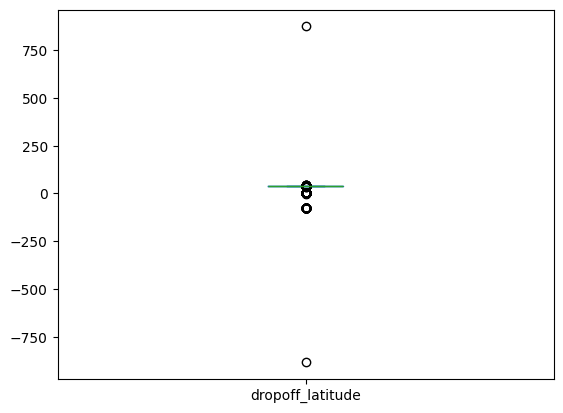

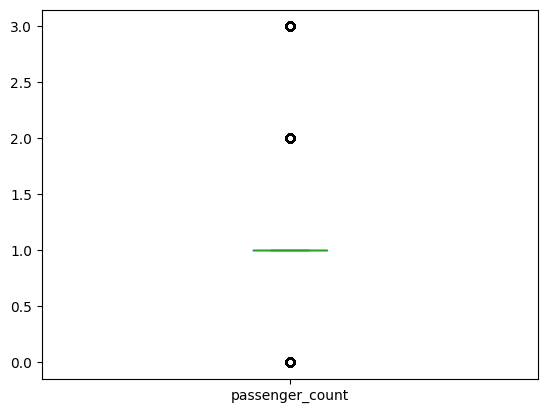

In [ ]:
for col in removed_outlier.select_dtypes(include='number').columns:
    removed_outlier[col].plot(kind='box')
    plt.show()

# 3. Check correlation

In [ ]:
import seaborn as sns

<Axes: >

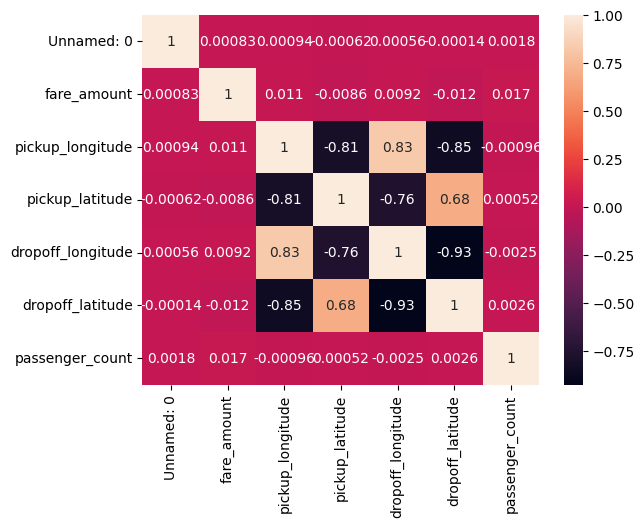

In [ ]:
sns.heatmap(removed_outlier.select_dtypes(include='number').corr(), annot=True)

# 4. Implement Linear Regression and Random Forest Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df_model=removed_outlier.copy()
X = df_model.select_dtypes(include='number').drop(columns=['Unnamed: 0', 'fare_amount'])
y = df_model['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [ ]:
linear_model.predict(X_test)

array([11.255103  , 11.255034  , 11.25646539, ..., 11.25472008,
       11.25406951, 11.95337566])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df_random_model=removed_outlier.copy()
X = df_random_model.select_dtypes(include='number').drop(columns=['Unnamed: 0','fare_amount'])
y = df_random_model['fare_amount']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

random_model = RandomForestRegressor()
random_model.fit(Xtrain, ytrain)
y_pred_rf = random_model.predict(X_test)


In [ ]:
random_model.predict(Xtest)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Linear Regression - RMSE:", round(rmse_linear, 4), "R²:", round(r2_linear, 4))
print("Random Forest - RMSE:", round(rmse_rf, 4), "R²:", round(r2_rf, 4))


Linear Regression - RMSE: 10.1583 R²: 0.0006
Random Forest - RMSE: 5.4021 R²: 0.7174


In [ ]:
# prompt: predict values for a random define value

# Define a new data point for prediction (replace with your desired values)
new_data_point = pd.DataFrame({
    'pickup_longitude': [-73.985],
    'pickup_latitude': [40.758],
    'dropoff_longitude': [-73.980],
    'dropoff_latitude': [40.761],
    'passenger_count': [2]
})

# Predict using the linear regression model
predicted_fare_linear = linear_model.predict(new_data_point)

# Predict using the random forest model
predicted_fare_rf = random_model.predict(new_data_point)

print("Predicted fare (Linear Regression):", predicted_fare_linear[0])
print("Predicted fare (Random Forest):", predicted_fare_rf[0])

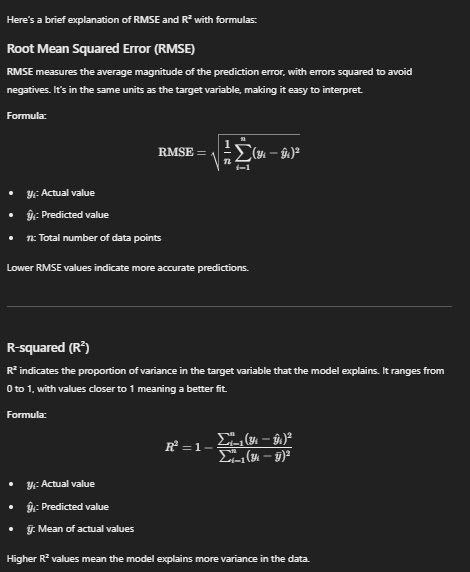